In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#importing packages we know we will need upfront
import seaborn as sns

from scipy.stats import iqr

from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [3]:
# Uploading imputed data to df from CSV WorkingDataFrame
df = pd.read_csv('LMPDStopsDatFrame.csv', index_col=0)
df.head()

,ID,TYPE_OF_STOP,CITATION_CONTROL_NUMBER,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_DATE,ACTIVITY_TIME,ACTIVITY_LOCATION,ACTIVITY_DIVISION,ACTIVITY_BEAT,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS,WAS_VEHCILE_SEARCHED,REASON_FOR_SEARCH
0,1,NaN,NaN,WARNING,NaN,NaN,NaN,2015-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,2,NaN,NaN,WARNING,NaN,NaN,NaN,2015-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,3,NaN,NaN,WARNING,NaN,NaN,NaN,2016-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,4,NaN,NaN,WARNING,F,WHITE,21 - 30,2016-01-22,14:42:00,SHAWNEE PARK,2ND DIVISION,BEAT 1,M,BLACK,31 - 40,3,NO,NaN
4,5,NaN,NaN,WARNING,F,WHITE,21 - 30,2015-09-14,21:10:00,RIVERPARK/34TH,2ND DIVISION,BEAT 1,M,BLACK,20 - 25,0,YES,PROBABLE CAUSE


# Data Imputation & Cleaning #

In [4]:
#fill missing values for each column using its own most frequent value
df = df.fillna(df.mode().iloc[0])
df.isnull().sum()

ID                         0
TYPE_OF_STOP               0
CITATION_CONTROL_NUMBER    0
ACTIVITY RESULTS           0
OFFICER_GENDER             0
OFFICER_RACE               0
OFFICER_AGE_RANGE          0
ACTIVITY_DATE              0
ACTIVITY_TIME              0
ACTIVITY_LOCATION          0
ACTIVITY_DIVISION          0
ACTIVITY_BEAT              0
DRIVER_GENDER              0
DRIVER_RACE                0
DRIVER_AGE_RANGE           0
NUMBER OF PASSENGERS       0
WAS_VEHCILE_SEARCHED       0
REASON_FOR_SEARCH          0
dtype: int64

In [5]:
# Creating a copy of the dataset, to recode values to be numerical for data analysis. 
df2 = df.copy(deep=True)
df2.head()

,ID,TYPE_OF_STOP,CITATION_CONTROL_NUMBER,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_DATE,ACTIVITY_TIME,ACTIVITY_LOCATION,ACTIVITY_DIVISION,ACTIVITY_BEAT,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS,WAS_VEHCILE_SEARCHED,REASON_FOR_SEARCH
0,1,TRAFFIC VIOLATION,0,WARNING,M,WHITE,40 - 50,2015-01-24,22:00:00,DIXIE HWY ...,6TH DIVISION,BEAT 2,M,WHITE,31 - 40,0,NO,CONSENT
1,2,TRAFFIC VIOLATION,0,WARNING,M,WHITE,40 - 50,2015-01-30,22:00:00,DIXIE HWY ...,6TH DIVISION,BEAT 2,M,WHITE,31 - 40,0,NO,CONSENT
2,3,TRAFFIC VIOLATION,0,WARNING,M,WHITE,40 - 50,2016-09-20,22:00:00,DIXIE HWY ...,6TH DIVISION,BEAT 2,M,WHITE,31 - 40,0,NO,CONSENT
3,4,TRAFFIC VIOLATION,0,WARNING,F,WHITE,21 - 30,2016-01-22,14:42:00,SHAWNEE PARK,2ND DIVISION,BEAT 1,M,BLACK,31 - 40,3,NO,CONSENT
4,5,TRAFFIC VIOLATION,0,WARNING,F,WHITE,21 - 30,2015-09-14,21:10:00,RIVERPARK/34TH,2ND DIVISION,BEAT 1,M,BLACK,20 - 25,0,YES,PROBABLE CAUSE


In [6]:
print(df2.nunique())

ID                         111582
TYPE_OF_STOP                    3
CITATION_CONTROL_NUMBER     82661
ACTIVITY RESULTS                2
OFFICER_GENDER                  2
OFFICER_RACE                    5
OFFICER_AGE_RANGE               5
ACTIVITY_DATE                1125
ACTIVITY_TIME                1440
ACTIVITY_LOCATION           47718
ACTIVITY_DIVISION              10
ACTIVITY_BEAT                   8
DRIVER_GENDER                   2
DRIVER_RACE                    10
DRIVER_AGE_RANGE                8
NUMBER OF PASSENGERS           26
WAS_VEHCILE_SEARCHED            2
REASON_FOR_SEARCH             296
dtype: int64


In [7]:
df2['ACTIVITY RESULTS']=df2['ACTIVITY RESULTS'].replace({'WARNING': 0, 'CITATION ISSUED': 1})
df2.head()

,ID,TYPE_OF_STOP,CITATION_CONTROL_NUMBER,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_DATE,ACTIVITY_TIME,ACTIVITY_LOCATION,ACTIVITY_DIVISION,ACTIVITY_BEAT,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS,WAS_VEHCILE_SEARCHED,REASON_FOR_SEARCH
0,1,TRAFFIC VIOLATION,0,0,M,WHITE,40 - 50,2015-01-24,22:00:00,DIXIE HWY ...,6TH DIVISION,BEAT 2,M,WHITE,31 - 40,0,NO,CONSENT
1,2,TRAFFIC VIOLATION,0,0,M,WHITE,40 - 50,2015-01-30,22:00:00,DIXIE HWY ...,6TH DIVISION,BEAT 2,M,WHITE,31 - 40,0,NO,CONSENT
2,3,TRAFFIC VIOLATION,0,0,M,WHITE,40 - 50,2016-09-20,22:00:00,DIXIE HWY ...,6TH DIVISION,BEAT 2,M,WHITE,31 - 40,0,NO,CONSENT
3,4,TRAFFIC VIOLATION,0,0,F,WHITE,21 - 30,2016-01-22,14:42:00,SHAWNEE PARK,2ND DIVISION,BEAT 1,M,BLACK,31 - 40,3,NO,CONSENT
4,5,TRAFFIC VIOLATION,0,0,F,WHITE,21 - 30,2015-09-14,21:10:00,RIVERPARK/34TH,2ND DIVISION,BEAT 1,M,BLACK,20 - 25,0,YES,PROBABLE CAUSE


In [8]:
#replacing year with 2025 to 2015.. assuming a typo 
df2['ACTIVITY_DATE'] = df2['ACTIVITY_DATE'].str.replace("2025","2015")

In [9]:
#converting time column data type to Datetime64
df2['ACTIVITY_DATE']=df2['ACTIVITY_DATE'].astype('Datetime64',copy=True) 

In [10]:
#Adding new column of just the year of the activity date
df2['ACTIVITY_MONTH_YEAR'] = df2['ACTIVITY_DATE'].dt.strftime('%m/%y')
df2['ACTIVITY_MONTH'] = df2['ACTIVITY_DATE'].dt.strftime('%m')
df2['ACTIVITY_DAY'] = df2['ACTIVITY_DATE'].dt.strftime('%d') 
df2['ACTIVITY_YEAR'] = df2['ACTIVITY_DATE'].dt.strftime('%y')
df2.head()

,ID,TYPE_OF_STOP,CITATION_CONTROL_NUMBER,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_DATE,ACTIVITY_TIME,ACTIVITY_LOCATION,...,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS,WAS_VEHCILE_SEARCHED,REASON_FOR_SEARCH,ACTIVITY_MONTH_YEAR,ACTIVITY_MONTH,ACTIVITY_DAY,ACTIVITY_YEAR
0,1,TRAFFIC VIOLATION,0,0,M,WHITE,40 - 50,2015-01-24,22:00:00,DIXIE HWY ...,...,M,WHITE,31 - 40,0,NO,CONSENT,01/15,01,24,15
1,2,TRAFFIC VIOLATION,0,0,M,WHITE,40 - 50,2015-01-30,22:00:00,DIXIE HWY ...,...,M,WHITE,31 - 40,0,NO,CONSENT,01/15,01,30,15
2,3,TRAFFIC VIOLATION,0,0,M,WHITE,40 - 50,2016-09-20,22:00:00,DIXIE HWY ...,...,M,WHITE,31 - 40,0,NO,CONSENT,09/16,09,20,16
3,4,TRAFFIC VIOLATION,0,0,F,WHITE,21 - 30,2016-01-22,14:42:00,SHAWNEE PARK,...,M,BLACK,31 - 40,3,NO,CONSENT,01/16,01,22,16
4,5,TRAFFIC VIOLATION,0,0,F,WHITE,21 - 30,2015-09-14,21:10:00,RIVERPARK/34TH,...,M,BLACK,20 - 25,0,YES,PROBABLE CAUSE,09/15,09,14,15


In [11]:
#Adding new column of just the year of the activity date
df2['ACTIVITY_MONTH_YEAR'] = df2['ACTIVITY_DATE'].dt.strftime('%m/%y')
df2['ACTIVITY_MONTH'] = df2['ACTIVITY_DATE'].dt.strftime('%m')
df2['ACTIVITY_DAY'] = df2['ACTIVITY_DATE'].dt.strftime('%d') 
df2['ACTIVITY_YEAR'] = df2['ACTIVITY_DATE'].dt.strftime('%y')
df2.head()

,ID,TYPE_OF_STOP,CITATION_CONTROL_NUMBER,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_DATE,ACTIVITY_TIME,ACTIVITY_LOCATION,...,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS,WAS_VEHCILE_SEARCHED,REASON_FOR_SEARCH,ACTIVITY_MONTH_YEAR,ACTIVITY_MONTH,ACTIVITY_DAY,ACTIVITY_YEAR
0,1,TRAFFIC VIOLATION,0,0,M,WHITE,40 - 50,2015-01-24,22:00:00,DIXIE HWY ...,...,M,WHITE,31 - 40,0,NO,CONSENT,01/15,01,24,15
1,2,TRAFFIC VIOLATION,0,0,M,WHITE,40 - 50,2015-01-30,22:00:00,DIXIE HWY ...,...,M,WHITE,31 - 40,0,NO,CONSENT,01/15,01,30,15
2,3,TRAFFIC VIOLATION,0,0,M,WHITE,40 - 50,2016-09-20,22:00:00,DIXIE HWY ...,...,M,WHITE,31 - 40,0,NO,CONSENT,09/16,09,20,16
3,4,TRAFFIC VIOLATION,0,0,F,WHITE,21 - 30,2016-01-22,14:42:00,SHAWNEE PARK,...,M,BLACK,31 - 40,3,NO,CONSENT,01/16,01,22,16
4,5,TRAFFIC VIOLATION,0,0,F,WHITE,21 - 30,2015-09-14,21:10:00,RIVERPARK/34TH,...,M,BLACK,20 - 25,0,YES,PROBABLE CAUSE,09/15,09,14,15


#Changing column Activity_Time from 24 hour to 12 hour 
import datetime
times = df_concat['ACTIVITY_TIME']
df_concat['ACTIVITY_TIME']=[datetime.datetime.strptime(time, "%H:%M:%S").strftime("%I:%M %p") for time in times]

In [12]:
#Replacing 'over 60' with age range 61-70, and 'UNDER 16' with age range 15-10
df2= df2.replace({'OFFICER_AGE_RANGE': {'OVER 60': '61 - 70'}})
df2= df2.replace({'DRIVER_AGE_RANGE': {'OVER 60': '61 - 70', 'UNDER 16': '15 - 10'}})
df2.head()

,ID,TYPE_OF_STOP,CITATION_CONTROL_NUMBER,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_DATE,ACTIVITY_TIME,ACTIVITY_LOCATION,...,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS,WAS_VEHCILE_SEARCHED,REASON_FOR_SEARCH,ACTIVITY_MONTH_YEAR,ACTIVITY_MONTH,ACTIVITY_DAY,ACTIVITY_YEAR
0,1,TRAFFIC VIOLATION,0,0,M,WHITE,40 - 50,2015-01-24,22:00:00,DIXIE HWY ...,...,M,WHITE,31 - 40,0,NO,CONSENT,01/15,01,24,15
1,2,TRAFFIC VIOLATION,0,0,M,WHITE,40 - 50,2015-01-30,22:00:00,DIXIE HWY ...,...,M,WHITE,31 - 40,0,NO,CONSENT,01/15,01,30,15
2,3,TRAFFIC VIOLATION,0,0,M,WHITE,40 - 50,2016-09-20,22:00:00,DIXIE HWY ...,...,M,WHITE,31 - 40,0,NO,CONSENT,09/16,09,20,16
3,4,TRAFFIC VIOLATION,0,0,F,WHITE,21 - 30,2016-01-22,14:42:00,SHAWNEE PARK,...,M,BLACK,31 - 40,3,NO,CONSENT,01/16,01,22,16
4,5,TRAFFIC VIOLATION,0,0,F,WHITE,21 - 30,2015-09-14,21:10:00,RIVERPARK/34TH,...,M,BLACK,20 - 25,0,YES,PROBABLE CAUSE,09/15,09,14,15


In [13]:
#using split_mean() function to split age ranges to calculate mean, added columns'OFFICER_AGE_MEAN' & 'DRIVER_AGE_MEAN'
def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

df2['OFFICER_AGE_MEAN'] = df2['OFFICER_AGE_RANGE'].apply(lambda x: split_mean(x))
df2['DRIVER_AGE_MEAN'] = df2['DRIVER_AGE_RANGE'].apply(lambda x: split_mean(x))

In [14]:
df2.head()

,ID,TYPE_OF_STOP,CITATION_CONTROL_NUMBER,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_DATE,ACTIVITY_TIME,ACTIVITY_LOCATION,...,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS,WAS_VEHCILE_SEARCHED,REASON_FOR_SEARCH,ACTIVITY_MONTH_YEAR,ACTIVITY_MONTH,ACTIVITY_DAY,ACTIVITY_YEAR,OFFICER_AGE_MEAN,DRIVER_AGE_MEAN
0,1,TRAFFIC VIOLATION,0,0,M,WHITE,40 - 50,2015-01-24,22:00:00,DIXIE HWY ...,...,31 - 40,0,NO,CONSENT,01/15,01,24,15,45.0,35.5
1,2,TRAFFIC VIOLATION,0,0,M,WHITE,40 - 50,2015-01-30,22:00:00,DIXIE HWY ...,...,31 - 40,0,NO,CONSENT,01/15,01,30,15,45.0,35.5
2,3,TRAFFIC VIOLATION,0,0,M,WHITE,40 - 50,2016-09-20,22:00:00,DIXIE HWY ...,...,31 - 40,0,NO,CONSENT,09/16,09,20,16,45.0,35.5
3,4,TRAFFIC VIOLATION,0,0,F,WHITE,21 - 30,2016-01-22,14:42:00,SHAWNEE PARK,...,31 - 40,3,NO,CONSENT,01/16,01,22,16,25.5,35.5
4,5,TRAFFIC VIOLATION,0,0,F,WHITE,21 - 30,2015-09-14,21:10:00,RIVERPARK/34TH,...,20 - 25,0,YES,PROBABLE CAUSE,09/15,09,14,15,25.5,22.5


In [15]:
df2['TIME_AM/PM'] = df2['ACTIVITY_TIME']

In [16]:
#Changing column Activity_Time from 24 hour to 12 hour 
import datetime
times = df2['TIME_AM/PM']
df2['TIME_AM/PM']=[datetime.datetime.strptime(time, "%H:%M:%S").strftime("%I:%M %p") for time in times]

In [17]:
df2['ACTIVITY_TIME'] = pd.to_datetime(df2['ACTIVITY_TIME'], errors='coerce')

In [18]:
df = df2.assign(SESSION=pd.cut(df2['ACTIVITY_TIME'].dt.hour,[-1,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))


In [19]:
df.head()

,ID,TYPE_OF_STOP,CITATION_CONTROL_NUMBER,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_DATE,ACTIVITY_TIME,ACTIVITY_LOCATION,...,WAS_VEHCILE_SEARCHED,REASON_FOR_SEARCH,ACTIVITY_MONTH_YEAR,ACTIVITY_MONTH,ACTIVITY_DAY,ACTIVITY_YEAR,OFFICER_AGE_MEAN,DRIVER_AGE_MEAN,TIME_AM/PM,SESSION
0,1,TRAFFIC VIOLATION,0,0,M,WHITE,40 - 50,2015-01-24,2019-06-05 22:00:00,DIXIE HWY ...,...,NO,CONSENT,01/15,01,24,15,45.0,35.5,10:00 PM,Evening
1,2,TRAFFIC VIOLATION,0,0,M,WHITE,40 - 50,2015-01-30,2019-06-05 22:00:00,DIXIE HWY ...,...,NO,CONSENT,01/15,01,30,15,45.0,35.5,10:00 PM,Evening
2,3,TRAFFIC VIOLATION,0,0,M,WHITE,40 - 50,2016-09-20,2019-06-05 22:00:00,DIXIE HWY ...,...,NO,CONSENT,09/16,09,20,16,45.0,35.5,10:00 PM,Evening
3,4,TRAFFIC VIOLATION,0,0,F,WHITE,21 - 30,2016-01-22,2019-06-05 14:42:00,SHAWNEE PARK,...,NO,CONSENT,01/16,01,22,16,25.5,35.5,02:42 PM,Afternoon
4,5,TRAFFIC VIOLATION,0,0,F,WHITE,21 - 30,2015-09-14,2019-06-05 21:10:00,RIVERPARK/34TH,...,YES,PROBABLE CAUSE,09/15,09,14,15,25.5,22.5,09:10 PM,Evening


In [20]:
X1 = df.filter(['TYPE_OF_STOP', 'OFFICER_GENDER', 'DRIVER_GENDER', 'ACTIVITY_BEAT', 'OFFICER_AGE_RANGE', 'DRIVER_AGE_RANGE',
       'WAS_VEHCILE_SEARCHED', 'NUMBER OF PASSENGERS', 'ACTIVITY_DIVISION', 'SESSION'])
X2 = df.filter(['ID', 'CITATION_CONTROL_NUMBER', 'ACTIVITY_DATE', 'ACTIVITY_TIME', 'ACTIVITY_LOCATION', 
        'ACTIVITY_DIVISION', 'REASON_FOR_SEARCH', 'OFFICER_AGE_RANGE', 'DRIVER_AGE_RANGE'])

y = df.iloc[:, 3]


In [21]:
X1 = pd.get_dummies(X1)
X1.head()

,NUMBER OF PASSENGERS,TYPE_OF_STOP_COMPLAINT/CRIMINAL VIOLATION,TYPE_OF_STOP_COMPLIANCE STOP (KVE ONLY),TYPE_OF_STOP_TRAFFIC VIOLATION,OFFICER_GENDER_F,OFFICER_GENDER_M,DRIVER_GENDER_F,DRIVER_GENDER_M,ACTIVITY_BEAT_,ACTIVITY_BEAT_BEAT 1,...,ACTIVITY_DIVISION_4TH DIVISION,ACTIVITY_DIVISION_5TH DIVISION,ACTIVITY_DIVISION_6TH DIVISION,ACTIVITY_DIVISION_7TH DIVISION,ACTIVITY_DIVISION_8TH DIVISION,ACTIVITY_DIVISION_NON LMPD,SESSION_Night,SESSION_Morning,SESSION_Afternoon,SESSION_Evening
0,0,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,3,0,0,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [22]:
# Importing sklearn package to run logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [23]:
# define dependent and independent variables
X = X1

In [24]:
# Train/Test spilt on our data having test size be 25% of the main data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2019)

In [25]:
# Since the target variable is not 50/50 we are oversampling so that the target option (Churn, Yes or No) is even
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=2019)
X_train_resample, y_train_resample = ros.fit_resample(X_train, y_train)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [26]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear')

# fit the model with data
logreg = logreg.fit(X_train_resample,y_train_resample)

#
y_pred=logreg.predict(X_test)

In [27]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 5431,  1717],
       [ 3556, 17192]])

Text(0.5, 257.44, 'Predicted label')

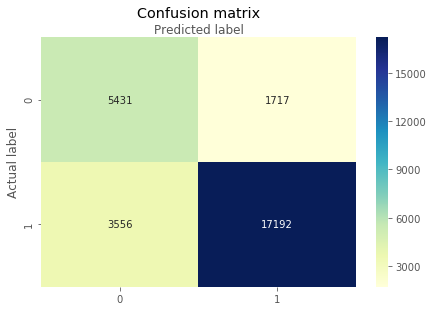

In [28]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [29]:
#Model Accuracy 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1_Score:",f1_score(y_test, y_pred, average='weighted'))
print("AUC:",roc_auc_score(y_test, y_pred)) 

Accuracy: 0.8109764840837396
F1_Score: 0.8173657798007119
AUC: 0.7942014677906941


In [30]:
df_concat = pd.concat([X1, X2], axis=1, sort=False)
df_concat.head()

,NUMBER OF PASSENGERS,TYPE_OF_STOP_COMPLAINT/CRIMINAL VIOLATION,TYPE_OF_STOP_COMPLIANCE STOP (KVE ONLY),TYPE_OF_STOP_TRAFFIC VIOLATION,OFFICER_GENDER_F,OFFICER_GENDER_M,DRIVER_GENDER_F,DRIVER_GENDER_M,ACTIVITY_BEAT_,ACTIVITY_BEAT_BEAT 1,...,SESSION_Evening,ID,CITATION_CONTROL_NUMBER,ACTIVITY_DATE,ACTIVITY_TIME,ACTIVITY_LOCATION,ACTIVITY_DIVISION,REASON_FOR_SEARCH,OFFICER_AGE_RANGE,DRIVER_AGE_RANGE
0,0,0,0,1,0,1,0,1,0,0,...,1,1,0,2015-01-24,2019-06-05 22:00:00,DIXIE HWY ...,6TH DIVISION,CONSENT,40 - 50,31 - 40
1,0,0,0,1,0,1,0,1,0,0,...,1,2,0,2015-01-30,2019-06-05 22:00:00,DIXIE HWY ...,6TH DIVISION,CONSENT,40 - 50,31 - 40
2,0,0,0,1,0,1,0,1,0,0,...,1,3,0,2016-09-20,2019-06-05 22:00:00,DIXIE HWY ...,6TH DIVISION,CONSENT,40 - 50,31 - 40
3,3,0,0,1,1,0,0,1,0,1,...,0,4,0,2016-01-22,2019-06-05 14:42:00,SHAWNEE PARK,2ND DIVISION,CONSENT,21 - 30,31 - 40
4,0,0,0,1,1,0,0,1,0,1,...,1,5,0,2015-09-14,2019-06-05 21:10:00,RIVERPARK/34TH,2ND DIVISION,PROBABLE CAUSE,21 - 30,20 - 25


In [31]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111582 entries, 0 to 111581
Data columns (total 54 columns):
NUMBER OF PASSENGERS                         111582 non-null int64
TYPE_OF_STOP_COMPLAINT/CRIMINAL VIOLATION    111582 non-null uint8
TYPE_OF_STOP_COMPLIANCE STOP (KVE ONLY)      111582 non-null uint8
TYPE_OF_STOP_TRAFFIC VIOLATION               111582 non-null uint8
OFFICER_GENDER_F                             111582 non-null uint8
OFFICER_GENDER_M                             111582 non-null uint8
DRIVER_GENDER_F                              111582 non-null uint8
DRIVER_GENDER_M                              111582 non-null uint8
ACTIVITY_BEAT_                               111582 non-null uint8
ACTIVITY_BEAT_BEAT 1                         111582 non-null uint8
ACTIVITY_BEAT_BEAT 2                         111582 non-null uint8
ACTIVITY_BEAT_BEAT 3                         111582 non-null uint8
ACTIVITY_BEAT_BEAT 4                         111582 non-null uint8
ACTIVITY_BEAT_BEAT

In [ ]:
#df.to_csv('ImputedData', ',')